
# 1. Introduction/Business Problem

I am from Malaga Spain, specifically from a neighborhood called Pedregalejo,a beautiful spot for EU Nordic students who come to Malaga to learn spanish in the cost of Andalusia. 

The origin of the name of this area is unclear as Pedregalejo comes from the word pedregal meaning quarry. However, it was called this way even before a quarry even existed there. there is a lot of fishing tradition. In fact, many malagueños head to Pedregalejo on weekends to have lunch in one of the many fish restaurants on the boardwalk. There are still a few family-owned restaurants that head out to sea early in the morning and then sell in their restaurants the “catch of the day”. 

## Opening of Student Residence

The challenge is to find a suitable location for opening a new Student Residence nearby the beach and language schools where are  high variety of restaurants and hotels.

## Expected / Interested Audience

Students would come from wealthy countries such as Norway, Finland, Sweden or Denmark. They are really interested in the Spanish culture and food.



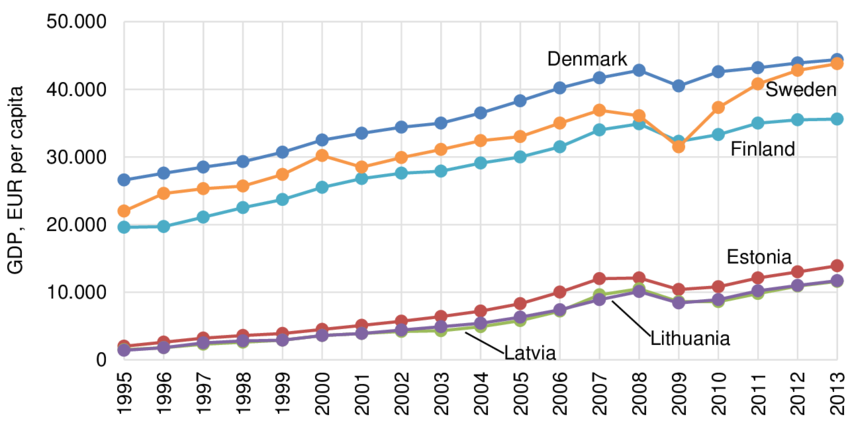




# 2.Data section

## 2.a What data is used?

We will be completely working on Foursquare data to explore and try to locate our residence where more student residences, Language centers with Spanish courses, beaches, restaurants are present nearby.

How will we be solving using this data?

We will looking for midpoint area of venues to locate our new hotel.Before that our major focus will be on all venues present in and around the core place of Pedregalejo.

## 2.b Importing Libraries

In [2]:
!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup
import requests
import pandas as pd

     |████████████████████████████████| 122kB 8.1MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 9.1MB/s eta 0:00:01


In [3]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print("*********   Loaded library     ***********")

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

## 2.c Credentials and Core location

In [9]:
CLIENT_ID = 'WZHLRHG4IS3IBOBVAE4GCB24AWAGFB1H2SUK0EH454KUKT32' # your Foursquare ID
CLIENT_SECRET = 'AJZ5ZYBVLBAFZ2E4XHE5RDYIU0KHV5VGGFIS35H2COWTHC40' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 150

address = "Pedregalejo, Malaga"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #8.079252 # location.latitude 
longitude =location.longitude #77.5499338 # location.longitude # 

marb='Pedregalejo location : {},{}'.format(latitude,longitude)
print(marb)



Pedregalejo location : 36.7237398,-4.373403


## 2.d Search for hotel, language schools and restaurant within 500M

In [10]:

#Quering for hotel & restaurant

search_query_hot = 'hotel'
search_query_SC = 'language school'
search_query_SR = 'restaurant'

radius = 500
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_hot, radius, LIMIT)
url_SC = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_SC, radius, LIMIT)
url_SR = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_SR, radius, LIMIT)
#url

### Send the GET Request of hotel & restaurants and examine the results

In [11]:
results_hotel = requests.get(url_hotel).json()
results_SC = requests.get(url_SC).json()
results_SR = requests.get(url_SR).json()
#results_hotel

### Get relevant part of JSON and transform it into a pandas dataframe

In [12]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_SC = results_SC['response']['venues']
venues_SR = results_SR['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_SC = json_normalize(venues_SC)
dataframe_SR = json_normalize(venues_SR)

dataframe = pd.concat([dataframe_hotel,dataframe_SC,dataframe_SR])

print("There are {} hotels, language schools and Restaurants at Pedregalejo".format(dataframe.shape[0]))

There are 13 hotels, language schools and Restaurants at Pedregalejo


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


### Define information of interest and filter dataframe

In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head(10)

,name,categories,distance,lat,lng,id
0,Hotel Acacias Malaga,Mediterranean Restaurant,395,36.722018,-4.369520,4bc78cc893bdeee1178137ae
1,La Chancla Hotel,Hotel Bar,348,36.720673,-4.372645,4b88e44bf964a520471232e3
2,Elcano Hotel Malaga,Hotel,320,36.722594,-4.370105,4bd1bb315e0cce7260e7a184
0,EF International Language Centres,College Academic Building,446,36.722638,-4.368595,4c178004d4ee95214a38ba05
1,Spanorama Languages,Student Center,188,36.722151,-4.374125,4e69f842814dc41d43cb6134
2,EF Escuela Internacional de Español,College & University,447,36.722767,-4.368539,4e393b75a809d73012e35fe3
0,Restaurante El Gauche,BBQ Joint,241,36.721708,-4.374350,4fa59ac2e4b0a34ac7bded78
1,Restaurante Mar de Pedregalejo,Mediterranean Restaurant,335,36.720893,-4.374633,4fc0c812e4b0152d44e0492b
2,Restaurante Las Acacias,Mediterranean Restaurant,395,36.721588,-4.369875,52307de7498e232166a2697d
3,Restaurante Merlo,Spanish Restaurant,483,36.720362,-4.369993,4baf4977f964a520aff53be3


## 2.e Location of Hotels, Restaurants, Language schools

In [14]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari

# add a red circle marker to represent the core location of kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Pedregalejo beach',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map